Shape of the dataset (37161, 13)
Dataset variable types: gyro_x          float64
gyro_y          float64
gyro_z          float64
accel_x         float64
accel_y         float64
accel_z         float64
std_acc_30      float64
std_gyro_10     float64
mean_acc_20     float64
mean_gyro_20    float64
max_acc_15      float64
min_acc_20      float64
Output          float64
dtype: object
First 10 rows of the dataset
    gyro_x   gyro_y   gyro_z   accel_x   accel_y   accel_z  std_acc_30  \
0  0.49875 -0.64750  0.13125  0.685396 -0.630008  0.383141         0.0   
1  0.47250 -0.72625  0.12250  0.684420 -0.630191  0.383690         0.0   
2  0.39375 -0.63875  0.12250  0.687531 -0.629764  0.383507         0.0   
3  0.35875 -0.65625  0.09625  0.686616 -0.628971  0.384056         0.0   
4  0.29750 -0.60375  0.14000  0.685640 -0.631594  0.382714         0.0   
5  0.14875 -0.65625  0.14875  0.685640 -0.630374  0.380152         0.0   
6  0.24500 -0.64750  0.12250  0.685701 -0.630862  0.382348         0.0

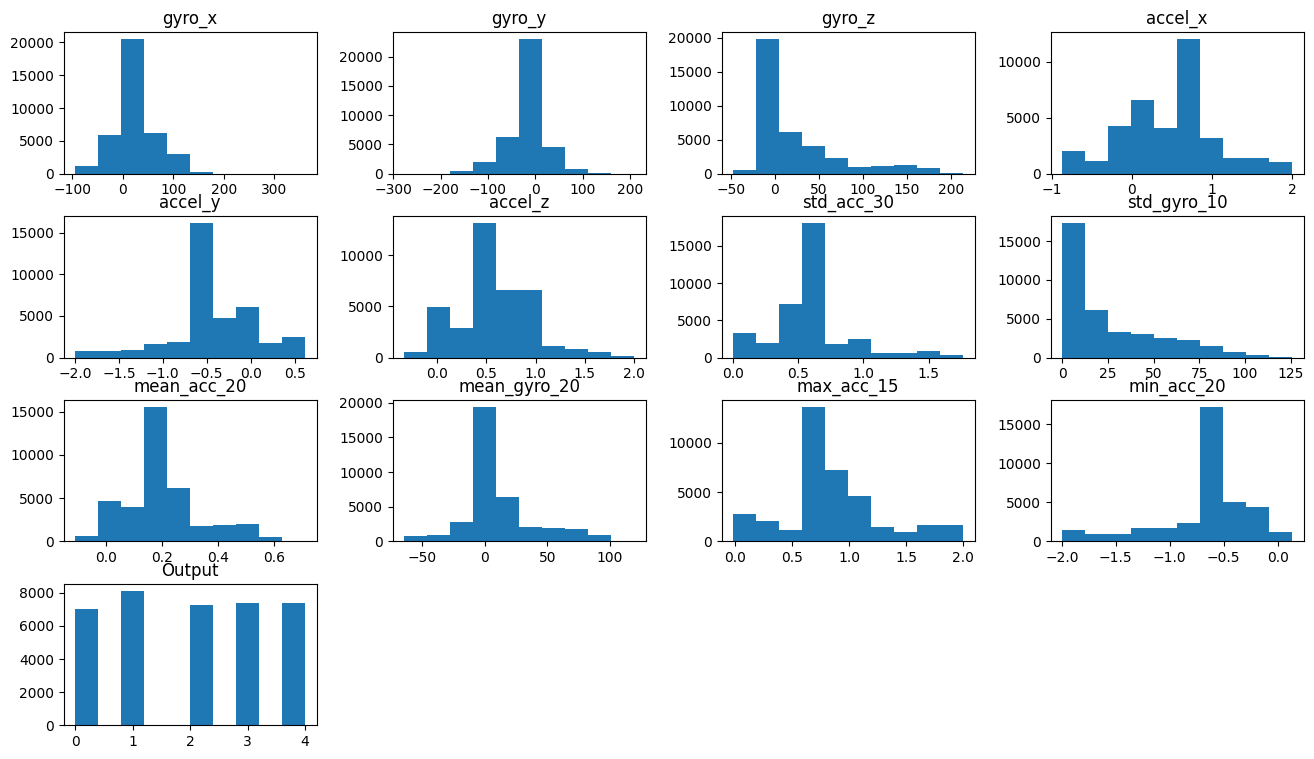

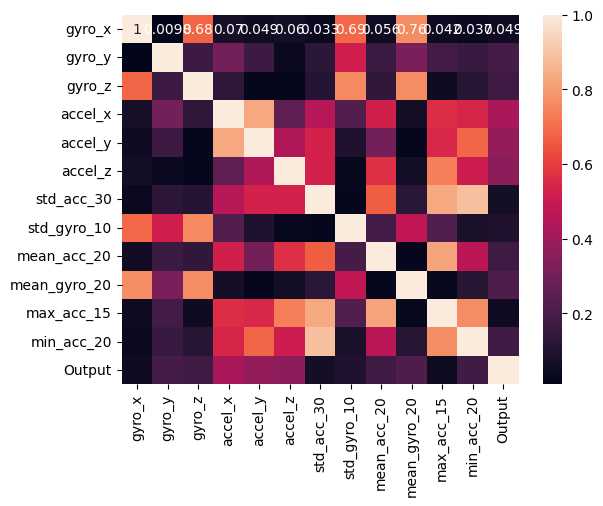

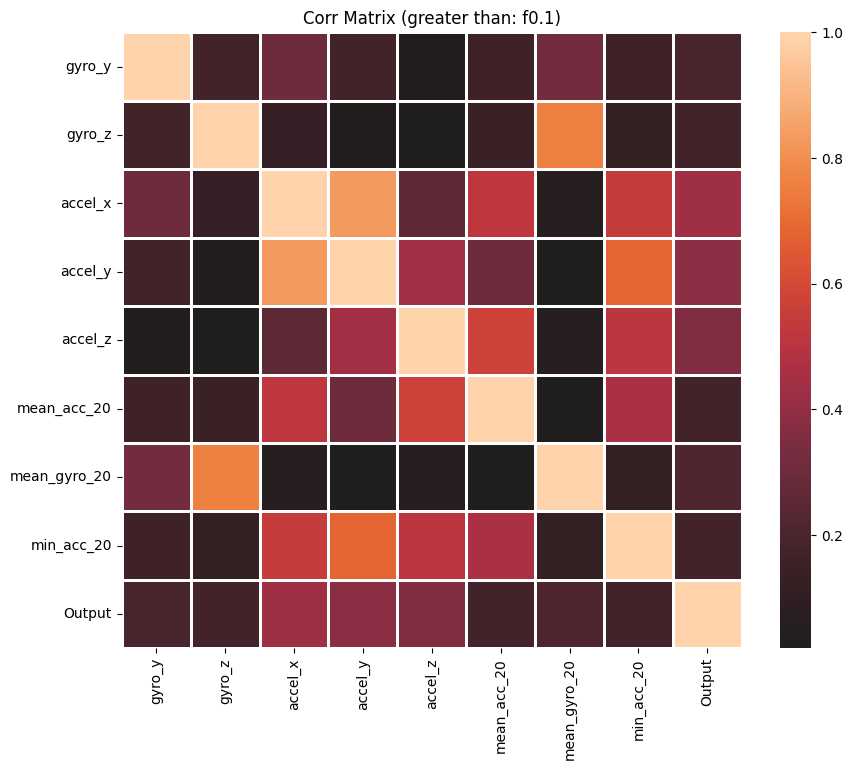

Accuracy for Logistic Regression: 0.9488747553816047
Accuracy for KNN Classifier: 0.9998369210697978
Accuracy for SVC Classifier: 0.9681996086105675
Accuracy for GaussianNB Regression: 0.9338714938030006
Accuracy for Decision Tree Classifier: 0.9968199608610567
Accuracy for Random Forest Classifier: 0.9989399869536856
Accuracy for Extra Trees Classifier: 0.9997553816046967
Best Model: KNN Classifier, Accuracy: 0.9998369210697978




Logistic Regression CV - acc :  0.9438088392138260
Logistic Regression test-acc :  0.9439008480104371
Logistic Regression: 43.61070275306702 sn

KNN Classifier CV - acc :  0.9726072631223973
KNN Classifier test-acc :  0.9738258317025440
KNN Classifier: 2.6831536293029785 sn

SVC Classifier CV - acc :  0.9114751331561683
SVC Classifier test-acc :  0.9143835616438356
SVC Classifier: 97.94441175460815 sn

Naive Bayes GaussianNB CV - acc :  0.9335663586447034
Naive Bayes GaussianNB test-acc :  0.9339530332681018
Naive Bayes GaussianNB: 0.14099860191345215 sn

D

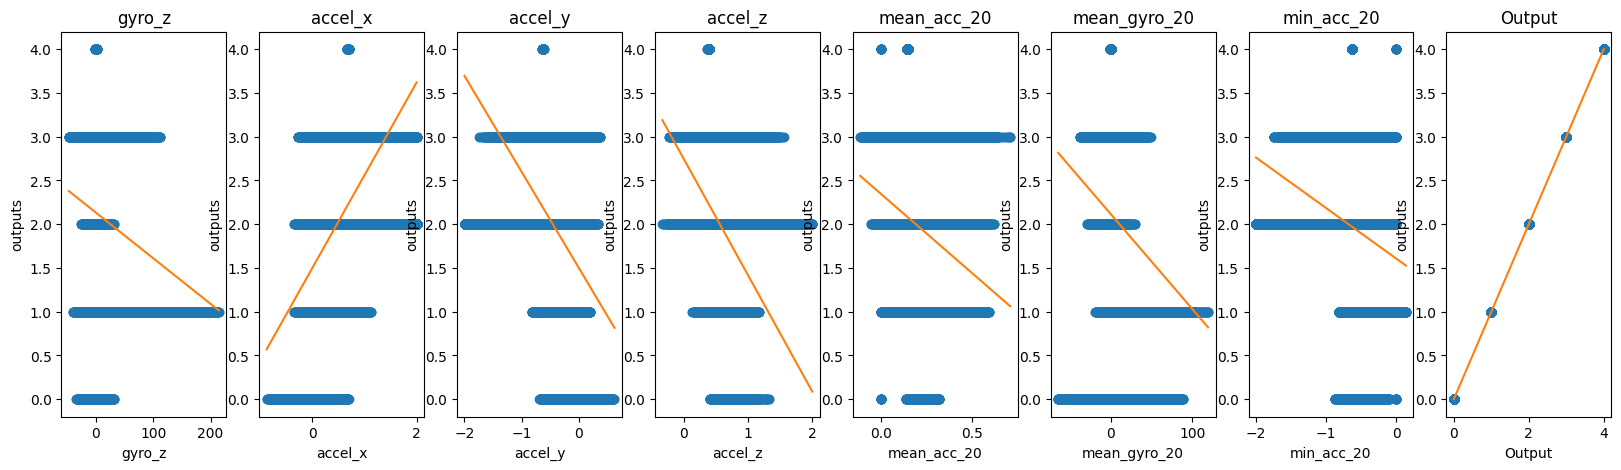

<Figure size 500x500 with 0 Axes>

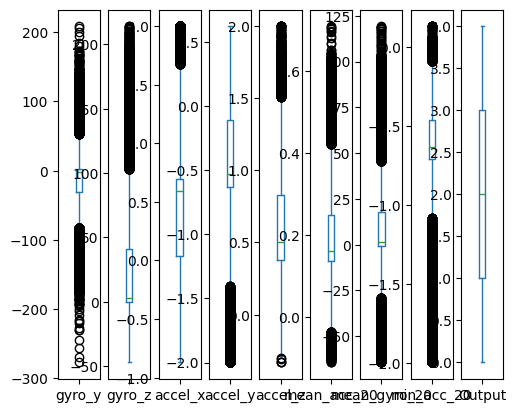

In [1]:
"""
Created on Sun Apr 28 22:23:48 2024

@author: İrem Beyza Gül
"""

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import seaborn as sns
from sklearn.preprocessing import StandardScaler


data = pd.read_csv("human_motion_detection.csv", sep=';')

search_value = ","
matching_cells = []


for index, row in data.iterrows():
    for column in data.columns:
        
        if isinstance(row[column], str) and search_value in row[column]:
            matching_cells.append((index, column))


for cell in matching_cells:
    data.at[cell[0], cell[1]] = 0


#print("\nDataFrame (values update with 0):")


le = LabelEncoder()


data['Output'] = le.fit_transform(data['Output'])


for column in data.columns:
    comma_rows = data[column].astype(str).str.contains(',')
    data.loc[comma_rows, column] = 0
    
data2=data.astype(float)


output = data2.columns.get_loc('Output')
print("Shape of the dataset",data2.shape)
print("Dataset variable types:",data2.dtypes)
print("First 10 rows of the dataset")
print(data2.head(10))
print("Statistical data of the dataset")
description=data2.describe()
print(description)

data2.hist(bins=10,figsize=(16,9),grid=False);

print("The correlation coefficient of the variables in the data set with each other")
corr=np.abs(data.corr(method='pearson'))
plt.figure()
sns.heatmap(corr, annot = True)

selected_column_name = data2.columns[output]

column_correlations = corr[selected_column_name]

threshold = 0.1

filtered_correlations = column_correlations[abs(column_correlations) >= threshold]

selected_columns = filtered_correlations.index

filtered_corr = corr.loc[selected_columns, selected_columns]

plt.figure(figsize=(10, 8))
sns.heatmap(filtered_corr, annot=False, fmt=".2f", linewidths=0.9, center=0)
plt.title(f"Corr Matrix (greater than: f{threshold})")
plt.show()

new_df = data2[selected_columns].copy()




features =new_df.drop(new_df.columns[0], axis=1)
predict = data2.iloc[:,output]

plt.figure(figsize=(20, 5))
for i, col in enumerate(features.columns):
    
    plt.subplot(1, len(features.columns), i+1)
    x = new_df[col]
    y = predict
    plt.plot(x, y, 'o')
    
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('outputs')


plt.figure(figsize=(5, 5))
new_df.plot(kind='box', subplots=True, layout=(1,10), sharex=False, sharey=False)

#CLASSİFİCATİON
x = data.iloc[:,0:-1].values 
y = data.iloc[:,-1].values 


from sklearn.model_selection import train_test_split

x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.33, random_state=47)

from sklearn.preprocessing import StandardScaler

sc=StandardScaler()

X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

import warnings
warnings.filterwarnings("ignore")


from sklearn.linear_model import LogisticRegression
logr = LogisticRegression(random_state=0)
logr.fit(X_train,y_train)

y_pred_logr = logr.predict(X_test)


from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test,y_pred_logr)



from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=1,metric="minkowski")

knn.fit(X_train,y_train)

y_pred_knn= knn.predict(X_test)

cm = confusion_matrix(y_test,y_pred_knn)

from sklearn.svm import SVC

svc=SVC(kernel="linear")
svc.fit(X_train,y_train)

y_pred_svc = svc.predict(X_test)

cm = confusion_matrix(y_test,y_pred_svc)

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred_gnb = gnb.predict(X_test)

cm = confusion_matrix(y_test,y_pred_gnb)


#DECİSİON TREE
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion = 'entropy')

dtc.fit(X_train,y_train)
y_pred_dtc = dtc.predict(X_test)

cm = confusion_matrix(y_test,y_pred_dtc)


#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(n_estimators=10,criterion="entropy")
rfc.fit(X_train,y_train)
y_pred_rfc=rfc.predict(X_test)
cm7=confusion_matrix(y_test, y_pred_rfc)

#ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesClassifier 

etc = ExtraTreesClassifier(n_estimators=100, random_state=42)
etc.fit(X_train, y_train)


y_pred_etc = etc.predict(X_test)



from sklearn.metrics import accuracy_score

# Logistic Regression
accuracy_logr = accuracy_score(y_test, y_pred_logr)
print("Accuracy for Logistic Regression:", accuracy_logr)

# KNN Classifier
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy for KNN Classifier:", accuracy_knn)

# SVC Classifier
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print("Accuracy for SVC Classifier:", accuracy_svc)


#Naive Bayes GaussianNB
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
print("Accuracy for GaussianNB Regression:", accuracy_gnb)

#DECİSİON TREE
accuracy_dtc = accuracy_score(y_test, y_pred_dtc)
print("Accuracy for Decision Tree Classifier:", accuracy_dtc)

#RANDOM FOREST
accuracy_rfc = accuracy_score(y_test, y_pred_rfc)
print("Accuracy for Random Forest Classifier:", accuracy_rfc)

# ExtraTree 
accuracy_etc = accuracy_score(y_test, y_pred_etc)
print("Accuracy for Extra Trees Classifier:", accuracy_etc)

accuracy_dict = {
    "Logistic Regression": accuracy_logr,
    "KNN Classifier": accuracy_knn,
    "SVC Classifier": accuracy_svc,
    "Naive Bayes GaussianNB": accuracy_gnb,
    "Decision Tree Classifier": accuracy_dtc,
    "Random Forest Classifier": accuracy_rfc,
    "Extra Tree Classifier": accuracy_etc
}

max_accuracy = max(accuracy_dict.values())
best_model = max(accuracy_dict, key=accuracy_dict.get)


print(f"Best Model: {best_model}, Accuracy: {max_accuracy}")
print("\n")
print("\n")



from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import time
from sklearn.model_selection import StratifiedKFold, cross_val_score
import pickle

models = {
    "Logistic Regression":LogisticRegression(solver='newton-cg', max_iter=1000),
    "KNN Classifier": KNeighborsClassifier(),
    "SVC Classifier": SVC(),
    "Naive Bayes GaussianNB": GaussianNB(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),
    "Extra Trees Classifier": ExtraTreesClassifier()
}

num_folds = 10
results = {}

start_time0 = time.time()
for name, model in models.items():
    start_time = time.time()
    
    skfold = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=47)
    cv_results = cross_val_score(model, x_train, y_train, cv=skfold, scoring="accuracy")
    
    mean_accuracy = cv_results.mean()
    
    model.fit(x_train, y_train)
    test_accuracy = model.score(x_test, y_test)
    results[name] = test_accuracy
    
    print(f"{name} CV - acc :  {mean_accuracy:.16f}")
    print(f"{name} test-acc :  {test_accuracy:.16f}")
    
    end_time = time.time()
    elapsed_time = end_time - start_time
    print(f"{name.ljust(8)}: {elapsed_time} sn\n")
    
end_time0 = time.time()
elapsed_time = end_time0 - start_time0
print(f"{elapsed_time} sn")
print("\n")

best_model = max(results, key=results.get)
print("Best Model depen on test: ", best_model)

models_dict = dict(models)
# Train the best model
best_model_instance = models_dict.get(best_model)
best_model_instance.fit(x_train, y_train)

# Evaluate the performance of the best model on the test set
test_accuracy = best_model_instance.score(x_test, y_test)
print("Test set accuracy score (best model):", test_accuracy)

# Calculate evaluation metrics for the best model
y_pred = best_model_instance.predict(x_test)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
# Print the evaluation metrics for the best model
print("\nEvaluation metric scores for best model which is {}:".format(best_model))
print("Test set accuracy:", test_accuracy)
print("Test set precision:", precision)
print("Test set recall:", recall)
print("Test set F1 score:", f1)


best_model = max(results, key=results.get)
print("Best model:", best_model)


best_model_instance = models_dict.get(best_model)


with open(f'models_best_model.pkl', 'wb') as f:
    pickle.dump(best_model_instance, f)

print("\n")